

# Brazillian Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## <a id='intro'></a>
## Introduction

### Dataset Description 

In this project patients' appointment schedule records would be analyzed  to show how certain recorded patient information like Age, Alcholic habits, Gender among a few others did or did not have significant relationships with  patients actually showing up for their appointments.  
This particular dataset consists of information of over 100,000 medical appointments in Brazil. The main focus of the dataset is whether the patients showed up for their appointments or not. The dataset consists of 14 columns:

**1- PatientId:** The ID of each patient.

**2- AppointmentID:** The ID of each appointment.

**3- Gender:** The gender of each patient.

**4- ScheduledDay:** The day at which the patient set up his appointment.

**5- AppointmentDay:** The day at which the patient should show up for his appointment.

**6- Age:** The age of each patient.

**7- Neighbourhood:** The place at which the appointment takes place.

**8- Scholarship:** It indicates whether the patient is enrolled in Brasilian welfare program or not.

**9- Hipertension:** It indicates whether the patient suffers from Hipertension or not.

**10- Diabetes:** It indicates whether the patient suffers from Diabetes or not.

**11- Alcoholism:** It indicates whether the patient suffers from Alcoholism or not.

**12- Handcap:** The number of handicaps that the patient has.

**13- SMS_received:** It indicates whether the patient received SMS or not.

**14- No-show:** It indicates whether the patient showed up for the appointment or not.



### Questions for Analysis
Q1. Can gender or age be associated with showups or misses?

Q2. Did wait period (time between schedule and appointment day) affect showing up?

Q3.  what were the showup characteristics across the various days of the week?

Q4. Did patient physiological factors (hypertension, diabetes, if they were handicapped or alcoholics) affect showing up?



In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

**Loading the dataset and viewing the first five rows**

In [2]:
schedule_df= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
schedule_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Assessing the data**

In [3]:
schedule_df.shape

(110527, 14)

the dataset contains exactly 110,527 rows and 14 columns.

In [4]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


-no missing value in any column.

-PatientId and AppointmentID would be converted  string type since they don't have any numeric usability.

-**ScheduledDay** and **AppointmentDay** are objects datatype not DayTime.

-**No-show** column's datatype needs to be integers to help us make statistic operations on it.


**Checking column names**

In [5]:
schedule_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

-some columns have case and spacing discrepancies which would have to be cleaned.

-some columns also have typographical errors like the "handcap" and "hipertension" columns



**checking for null values**

In [6]:
schedule_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null values in the dataset.

**Checking for duplicated rows**

In [7]:
schedule_df.duplicated().sum()

0

there are no duplicate rows in the dataset.

**Checking for unique values across all columns**

In [8]:
schedule_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

-The number of unique appointments >  unique patient IDs. This suggests that some patients had more than one appointment in the timeframe.

-There are 5 uniques values in the Handcap column which is supposed to hold two.

**Checking for negative values in the age column**

In [9]:
schedule_df.loc[ schedule_df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


one row with index 99832

**check in column value ranges are within reasonalble limits**

In [10]:
schedule_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Avg age of the patients is 37 years old.

Min Age is -1 to confirm the discovery earlier.

Max Age is 115 and this could be logically possible.

Handcap has min of 0 and max of 4 value to further confirm the discovery earlier.
 


### Data Cleaning
 

**Fixing PatientId type**

The patientID and AppointmentID would have to be changed to string type since they do not have any numeric usability.

In [11]:
#to drop the .0 of the float type
schedule_df['PatientId'] = schedule_df['PatientId'].astype(int)
#to change the type to string
schedule_df['PatientId'] = schedule_df['PatientId'].astype(str) 

In [12]:
# Fix AppointmentID datatype
schedule_df['AppointmentID'] = schedule_df['AppointmentID'].astype(str)

In [13]:
#check
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


**fixing schedule date and appointmentDay column datatypes**

while the data was being assessed it was also noticed that the AppointmentDay time are all set to 0s, so time would be dropped from both 'AppointmentDay" and "scheduleDay" columns since we don't have the actual AppointmentDay time.

In [14]:
#removeing time for both `AppointmentDay` and `ScheduledDay`
schedule_df['AppointmentDay'] = schedule_df['AppointmentDay'].str[:-10]
schedule_df['ScheduledDay'] = schedule_df['ScheduledDay'].str[:-10]

In [15]:
#check
schedule_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [16]:
# changing schedule date data type to datetime 
schedule_df['ScheduledDay'] = pd.to_datetime(schedule_df['ScheduledDay'])
#changing appointment date datatype to datetime 
schedule_df['AppointmentDay'] = pd.to_datetime(schedule_df['AppointmentDay'])


In [17]:
#check
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 11.8+ MB


**Creating a wait_time column (in days)**

This column would hold values for the time difference(in days) between the day the patient booked an appointment and the  day the appointment was scheduled to hold.


In [18]:
#subtract the two columns and assign the result to the new column "wait_time"
wait_time = schedule_df['AppointmentDay'].dt.date - schedule_df['ScheduledDay'].dt.date
wait_time =wait_time.dt.days

#  insert it in the column next to Appointment for legibility.
schedule_df.insert(5, 'Wait_time',wait_time)

In [19]:
#check
schedule_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Wait_time,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**checking for unrealistric wait_time values using wait_time**

Rows where recorded appointment date is before recorded schedule date.


In [20]:
#query for rows with wait_time less than 0
schedule_df.query('Wait_time<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Wait_time,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [21]:
#Drop records with wrong entry of appointement date compared with scheduled date
schedule_df.drop ( index = (schedule_df.query('Wait_time<0').index), axis=0, inplace=True)

In [22]:
#check
schedule_df.query('Wait_time<0')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Wait_time,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


**Cleaning the age column**

we would first query the table to see where we discovered the negative age during data assessment.

In [23]:
schedule_df.query("Age < 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Wait_time,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,0,-1,ROMÃO,0,0,0,0,0,0,No


since it is just a row, it can simply be removed.

In [24]:
#drop the row using the index where age = -1.
schedule_df.drop(index=schedule_df[schedule_df["Age"]==-1].index, inplace=True)

In [25]:
#check
schedule_df.describe()

,Wait_time,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,10.184345,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043
std,15.255153,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Add a weekday column**

In [26]:
#create day names from appointment Day column and store it in the weekday column
schedule_df['weekday'] = pd.to_datetime(schedule_df['AppointmentDay']).dt.day_name()

In [27]:
#check
schedule_df.head()
 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Wait_time,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,weekday
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


**cleeaning the handicap column**

Set values greater than 1 in the column to 1, since they should either be True or False


In [28]:
schedule_df.loc[schedule_df['Handcap'] > 1, 'Handcap'] = 1

In [29]:
#check
schedule_df['Handcap'].value_counts()

0    108282
1      2239
Name: Handcap, dtype: int64

**Cleaning no-show column**

from the dataset description the "no-show" column holds indicators for when patients misses an appointment so a "yes" there means the patient was absent and a "no" means the patient actually went for the appointment. This would to a large extend look counter-intuitive.

So, for sake of simplicity the column would be renamed to "show_up" and all the values interchanged so that a "yes" means the patient went for the appointment while a value of "no" would mean absence.

we would start this process by first converting the yes/no strings to 1/0 integers the performing the equivalent of the afore described operatoons on it

In [30]:
# first convert the "yes" and "no" string indicators to integer values of 1 and 0 respectively.
schedule_df['No-show'] = schedule_df['No-show'].apply(lambda val: 0 if val == 'No' else 1)

In [31]:
#check
schedule_df['No-show'].head()

0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int64

In [32]:
#then rename the column "No-show" to show up
schedule_df.rename(columns={'No-show':'show_up'}, inplace=True)


In [33]:
#check
schedule_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Wait_time', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'show_up', 'weekday'],
      dtype='object')

In [34]:
#flip the values(change all 1s to 0s and 0s to 1s) to reflect the logical change in the 
#column name from no_show to show_up
schedule_df['show_up'] = schedule_df['show_up'].apply(lambda val: 1 if val == 0 else 0)

In [35]:
#check
schedule_df.show_up.head()

0    1
1    1
2    1
3    1
4    1
Name: show_up, dtype: int64

the first five rows in the column that were 0s have now been changed to 1s.

**cleaning column names**

a few columms names like Hipertension and Handcap both contain typographical mistakes while PatientId, AppointmentID, ScheduledDay and AppointmentDay have issues with spacing inbetween words. The whole column names would then be changed to lowercase for consistency and spaces created with underscores.

In [36]:
schedule_df.rename(columns={'Hipertension':'hypertension','Handcap':'handicap','PatientId':'patient_id ','AppointmentID':'appointment_id','ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day'}, inplace=True)


In [37]:
#check
schedule_df.columns

Index(['patient_id ', 'appointment_id', 'Gender', 'scheduled_day',
       'appointment_day', 'Wait_time', 'Age', 'Neighbourhood', 'Scholarship',
       'hypertension', 'Diabetes', 'Alcoholism', 'handicap', 'SMS_received',
       'show_up', 'weekday'],
      dtype='object')

In [38]:
#convert all column names to lowercase for consistency
schedule_df.columns= schedule_df.columns.str.lower()

In [39]:
#check
schedule_df.columns

Index(['patient_id ', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'wait_time', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show_up', 'weekday'],
      dtype='object')

**Final check of the dataframe**


In [40]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
patient_id         110521 non-null object
appointment_id     110521 non-null object
gender             110521 non-null object
scheduled_day      110521 non-null datetime64[ns]
appointment_day    110521 non-null datetime64[ns]
wait_time          110521 non-null int64
age                110521 non-null int64
neighbourhood      110521 non-null object
scholarship        110521 non-null int64
hypertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handicap           110521 non-null int64
sms_received       110521 non-null int64
show_up            110521 non-null int64
weekday            110521 non-null object
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 14.3+ MB


In [41]:
schedule_df.nunique()

patient_id          62298
appointment_id     110521
gender                  2
scheduled_day         111
appointment_day        27
wait_time             129
age                   103
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                2
sms_received            2
show_up                 2
weekday                 6
dtype: int64

In [42]:
schedule_df.describe()

,wait_time,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,10.184345,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,0.798102
std,15.255153,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,0.401419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
schedule_df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,wait_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up,weekday
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday


In [44]:
schedule_df.tail(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,wait_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up,weekday
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,41,38,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday
110526,377511518121127,5629448,F,2016-04-27,2016-06-07,41,54,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday


<a id='eda'></a>
## Exploratory Data Analysis

### General dataset analysis

To aid this study certain analysis would be conducted on the data to get a surface overview of all the variables.

In [45]:
#count of appointments the patients were present
schedule_df.loc[(schedule_df['show_up'] == 1)].count()[0]

88207

In [46]:
#count of missed appointments
schedule_df.loc[(schedule_df['show_up'] == 0)].count()[0]

22314

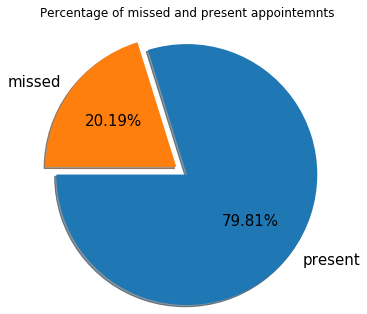

In [47]:
#create a visual plot of the above information with output as percentage to enhance legibilty
label_Names = ["present", "missed"]
data = [schedule_df.loc[(schedule_df['show_up'] == 1)].count()[0], schedule_df.loc[(schedule_df['show_up'] == 0)].count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of missed and present appointemnts",y=1.2);

>The percentage of missed appointments in the timeframe was about 20% with a total count of 22,314 while the count of present appointment was 88,207 with an approximate percentage of 80.

**Create a histogram of all columns in the dataset**

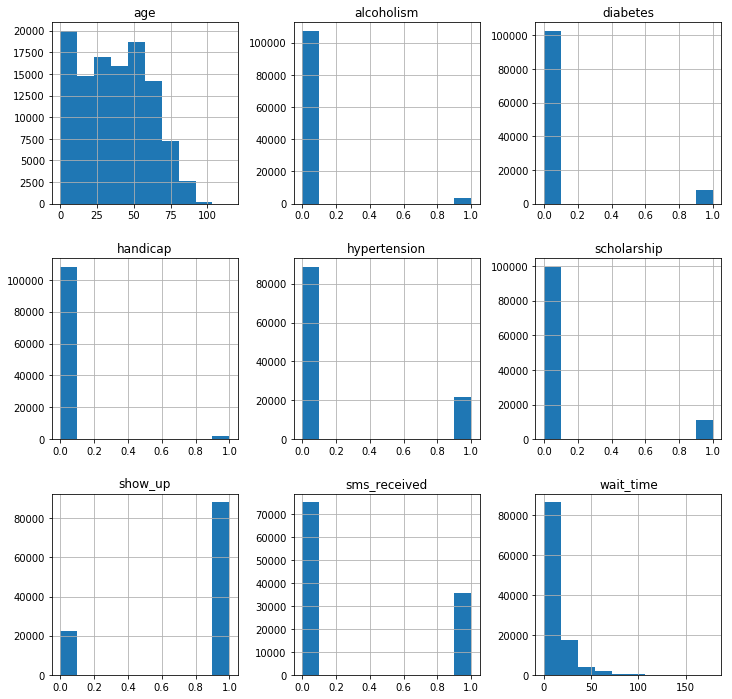

In [48]:
schedule_df.hist(figsize=(12,12));

>the age distribution could be said to be more densly popluated in the left with a peak around 0, while positive indicators for Alcoholism, hypertension and diabetes can be said to be fractional compared to negative indicators. The wait time is densly packed on Zero with a very steep decline as the number of days progresses.

### Can age or gender be associated with showups or misses?

**Age**

In [49]:
# Create  Age Groups for the sake of this analysis
bins = [0, 13, 19, 60, 116]
labels = ['child','teen','adult','senior_citizen']
schedule_df['age_group'] = pd.cut(schedule_df['age'], bins=bins, labels=labels, include_lowest= True, right= False)
#check
schedule_df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,wait_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up,weekday,age_group
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,senior_citizen
1,558997776694438,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,adult
2,4262962299951,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,senior_citizen


The age group classifications are as follows;

>child = 0-13 years

>teen = 14-19 years

>adult= 20-60 years

>senior_citizen = 61 years and above.

In [50]:
#get a count of show_up by age group
age_group_stat=schedule_df.groupby(["age_group","show_up"])['show_up'].count()
age_group_stat

age_group       show_up
child           0           4306
                1          16729
teen            0           2040
                1           5790
adult           0          12727
                1          47757
senior_citizen  0           3241
                1          17931
Name: show_up, dtype: int64

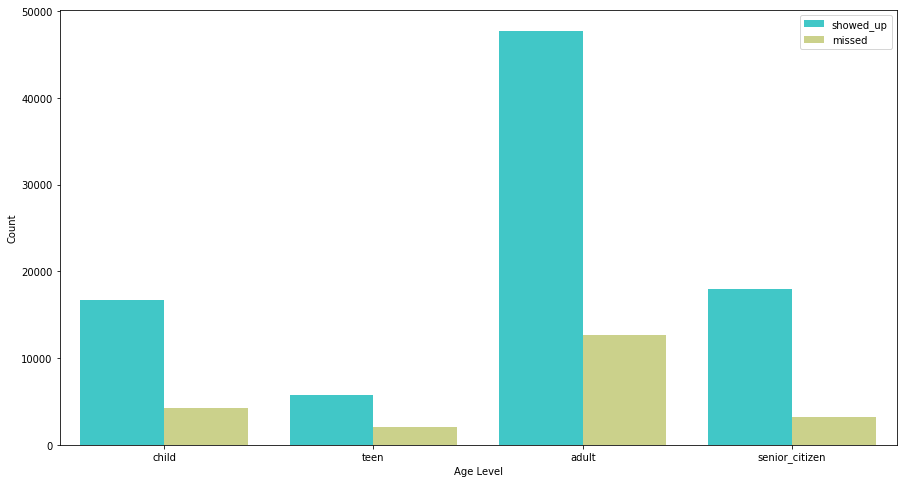

In [51]:
#create a visual of the data above
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
hue_order=[1,0]

sns.countplot(x='age_group', data=schedule_df, hue='show_up', palette='rainbow', hue_order=hue_order)
fig.set_figwidth(15)
fig.set_figheight(8)
ax1.set(xlabel='Age Level', ylabel='Count')
#place legend in upper left of plot
plt.legend(loc='upper right',labels=['showed_up', 'missed']);

>not so much can be done by way of comparism from the above graph because they are counts of different variables with unbalanced proportions.
so we try to get a proportion of show_ups or misses the total in the age groups and get the percentages.


In [52]:
# Count the total number of patients in each age group and store them in temporary age_group(a_g) variables
a_g1 = len(schedule_df.query('age_group == "child"'))
a_g2 = len(schedule_df.query('age_group == "teen"'))
a_g3 = len(schedule_df.query('age_group == "adult"'))
a_g4 = len(schedule_df.query('age_group == "senior_citizen"'))

In [53]:
#check
print(a_g1, a_g2,a_g3,a_g4)
  

21035 7830 60484 21172


In [54]:
#now proceed to get the proportion of showups and misses in percentage and rounding to 1 decimal place.
#showups
child_showup=round(((len(schedule_df.query('age_group == "child" & show_up==1'))/a_g1)*100),1)
teen_showup=round(((len(schedule_df.query('age_group == "teen" & show_up==1'))/a_g2)*100),1)
adult_showup=round(((len(schedule_df.query('age_group == "adult" & show_up==1'))/a_g3)*100),1)
senior_citizen_showup=round(((len(schedule_df.query('age_group == "senior_citizen" & show_up==1'))/a_g4)*100),1)

In [55]:
#check
print(child_showup, teen_showup,adult_showup, senior_citizen_showup)

79.5 73.9 79.0 84.7


In [56]:
#misses
child_misses=round(((len(schedule_df.query('age_group == "child" & show_up==0'))/a_g1)*100),1)
teen_misses=round(((len(schedule_df.query('age_group == "teen" & show_up==0'))/a_g2)*100),1)
adult_misses=round(((len(schedule_df.query('age_group == "adult" & show_up==0'))/a_g3)*100),1)
senior_citizen_misses=round(((len(schedule_df.query('age_group == "senior_citizen" & show_up==0'))/a_g4)*100),1)

In [57]:
#check
print(child_misses, teen_misses,adult_misses, senior_citizen_misses)

20.5 26.1 21.0 15.3


we then create a visual of the output for comparism (four inline pie charts)

Text(0.5,1,'Senior Citizens')

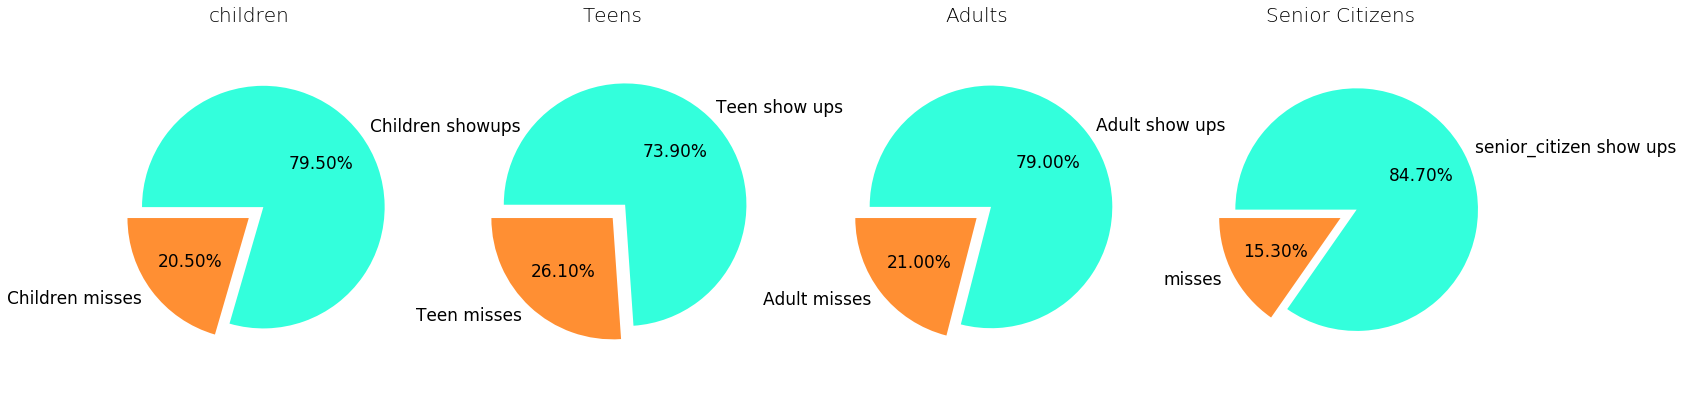

In [58]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(25,7))#ax1,ax2,ax3,ax4 refers to our 4 pie charts
# 1,4 denotes 1 row, 4 columns i.e stacking horizontally
colors = ['#FF8F33','#33FFDC']#the general colors
lb = ['Children misses', 'Children showups']# children labels
ax1.axis('equal'); 
data = [20.5, 79.5]
ax1.pie(data,radius=1,labels = lb,colors=colors,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":17});
ax1.set_title("children",{'fontsize':20,
        'fontweight' :100,
        'verticalalignment': 'baseline'})
lb = ['Teen misses', 'Teen show ups']#teen labels
ax2.axis('equal'); 
data = [26.1, 73.9]
ax2.pie(data,radius=1,labels = lb,colors=colors,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":17});
ax2.set_title("Teens",{'fontsize':20,
        'fontweight' :100,
        'verticalalignment': 'baseline'})
lb = ['Adult misses', 'Adult show ups']#adult labels
ax3.axis('equal'); 
data = [21.0, 79.0]
ax3.pie(data,radius=1,labels = lb,colors=colors,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":17});
ax3.set_title("Adults",{'fontsize':20,
        'fontweight' :100,
        'verticalalignment': 'baseline'})

lb = ['misses', 'senior_citizen show ups']#senior citizen labels
ax4.axis('equal'); 
data = [15.3, 84.7]
ax4.pie(data,radius=1,labels = lb,colors=colors,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":17});
ax4.set_title("Senior Citizens",{'fontsize':20,
        'fontweight' :200,
        'verticalalignment': 'baseline'})



>from the above visual it can deduced that the most percentage of misses was in the teens age group(26.1%) then followed by the adult age group(21.0%) which was closely followed by the children age group (20.50%) then the least showup percentage was in the senoir citizens category(15%) which to a large extent looks very significant. 

**Gender**

 An overview of the gender distribution of the patients

In [59]:
schedule_df.gender.value_counts()

F    71836
M    38685
Name: gender, dtype: int64

In [60]:
#normalize the count to get the fraction of these two unique values and then calculate their percentage by multiplying by 100.
schedule_df.gender.value_counts(normalize=True)*100

F    64.997602
M    35.002398
Name: gender, dtype: float64

>the gender distribution is unbalanced with females having about 65% of the appointments during the study period.

get showup and misses counts for both genders

In [100]:
schedule_df.groupby(["gender","show_up"])["show_up"].value_counts().unstack("gender")

,gender,F,M
show_up,show_up,,
0,0,1.0,1.0
1,1,1.0,1.0


create show up and miss proportions for both genders for ease of comparism

In [62]:
#female showup proportion
f_showup=len(schedule_df.query("gender=='F' & show_up ==1").index)/ len(schedule_df.query("gender=='F'").index)
#convert to percentage
f_showup= f_showup*100
f_showup

79.68845704103792

In [63]:
#female miss proportion
f_miss=len(schedule_df.query("gender=='F' & show_up ==0").index)/ len(schedule_df.query("gender=='F'").index)
#convert to percentage
f_miss = f_miss*100
f_miss

20.311542958962082

In [64]:
#male showup proportion
m_showup=len(schedule_df.query("gender=='M' & show_up ==1").index)/ len(schedule_df.query("gender=='M'").index)
#convert to percentage
m_showup=m_showup*100
m_showup

80.0361897376244

In [65]:
#female miss proportion
m_miss=len(schedule_df.query("gender=='M' & show_up ==0").index)/ len(schedule_df.query("gender=='M'").index)
#convert to percentage
m_miss= m_miss*100
m_miss

19.9638102623756

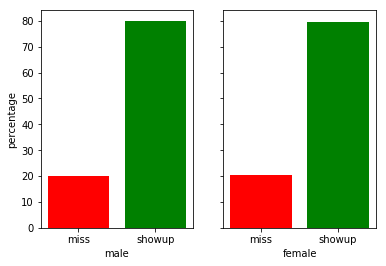

In [66]:
#we create a visual of both proportions for the two genders as subplots for ease of comparism.
labels = ['miss', 'showup']#the general labels
locations=[1,2]
#male plot
heights_m = [m_miss,m_showup]
plt.figure(figsize=(30,30))
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.set(xlabel='male', ylabel='percentage')
ax1.bar(locations, heights_m, tick_label=labels, color= ('r',"g"))
#female plot 
heights_f = [f_miss,f_showup]
ax2.set(xlabel='female')
ax2.bar(locations, heights_f, tick_label=labels, color= ('r',"g"))
 
plt.show();

>from the visuals above it can be inferred that the percentage of misses and showups for both genders are approximately the same, misses; male=19.96%, female=20.31% while show ups; female = 79.68%, male=80.03.
therefore the showup variation as per gender in this dataset is almost insignificant.

### Did the wait period  affect showing up?
The wait period column as created earlier for the sake of this analysis was the time between appointment schedule day and appointment day itself.


In [67]:
#explore the column
schedule_df.wait_time.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_time, dtype: float64

>The mean wait time over the study period is about 10days, the minmum is 0 i.e same day schedule and appointments while the maximum wait time is 179 days.

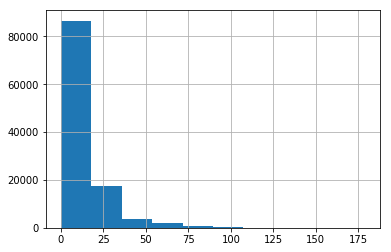

In [68]:
#overview of the distribution of the column
schedule_df.wait_time.hist();

>the wait time distribution can be said to very skewed to the right.

Create different dataframes for;

-same day scheduling and appointments (wait time =0)

-when wait time is greater than 0 days but less than 7 days (same week)

-when wait time is greater than 7 days but less than 31 days (same month)

-when wait time is greater than 31

Since a showup is denoted by an integer 1 in the show_up column the mean of show_ups across each of the dataframes would give us a proportion of the showup rows to the entire rows in the particular data
frame. So we proceed to find the mean showups across these dataframes.

In [69]:
#when wait time is 0(i.e same day scheduling and appointments)
same_day=schedule_df.query("wait_time == 0")
same_day_m=same_day.show_up.mean()#calculating the mean showup for this group
same_day_m

0.95352938125615894

In [70]:
#when wait time is >0 and <=7 
same_week=schedule_df.query("wait_time>0 & wait_time <= 7")
same_week_m=same_week.show_up.mean()#calculating the mean showup for this group
same_week_m

0.75852105017865468

In [71]:
#when wait time is >7 and =<31 
same_month=schedule_df.query("wait_time >7 & wait_time<= 31")
same_month_m=same_month.show_up.mean()#calculating the mean showup for this group
same_month_m

0.68255288013835302

In [72]:
#when wait time is >31 
greater=schedule_df.query("wait_time >31")
greater_m=greater.show_up.mean()#calculating the mean showup for this group
greater_m

0.66979188131052958

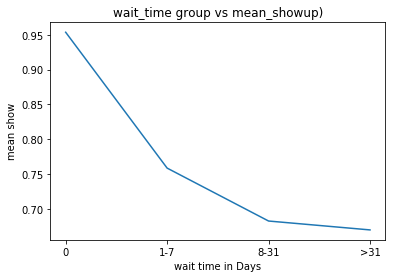

In [73]:
wait_time= ["0","1-7","8-31",">31"]
mean_showup= [same_day_m,same_week_m,same_month_m,greater_m]
plt.plot(wait_time, mean_showup)
plt.title('wait_time group vs mean_showup)')
plt.xlabel('wait time in Days')
plt.ylabel('mean show')
plt.show()

>from the visual above visual it can be inferred that there is a very significant decrease in mean show ups across our wait time distributions. Having a peak at the 0 days group(0.95) and the lowest mean was in the >31 days group(0.67).
This is indicative of the fact that the longer the interval between the schedule day and the appointment the lower the ratio of show ups.

###  what are the showup characteristics across the various days of the week?


An overview of the column

In [74]:
schedule_df.weekday.value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: weekday, dtype: int64

>most appointments were scheduled for weekdays with just 39 for saturdays and no one for Sundays.
the most apointments were scheduled for Wednesdays(25,866) and the least for Saturdays(39).

summary table of the showups on the various weekdays

In [75]:
schedule_df.groupby(["weekday","show_up"])["weekday"].count()

weekday    show_up
Friday     0           4037
           1          14982
Monday     0           4689
           1          18024
Saturday   0              9
           1             30
Thursday   0           3337
           1          13909
Tuesday    0           5150
           1          20488
Wednesday  0           5092
           1          20774
Name: weekday, dtype: int64

for sake of easy comparism we create dataframes for each day of the week and find the mean show up across the datframes.

In [76]:
#monday
showup_mon=schedule_df.query("weekday == 'Monday'")
showup_mon_m=showup_mon.show_up.mean()#calculating the mean showup for this group
showup_mon_m

0.79355435213313963

In [77]:
#tuesday
showup_tue=schedule_df.query("weekday == 'Tuesday'")
showup_mon_tue=showup_tue.show_up.mean()#calculating the mean showup for this group
showup_mon_tue

0.79912629690303461

In [78]:
#wednesday
showup_wed=schedule_df.query("weekday == 'Wednesday'")
showup_wed_m=showup_wed.show_up.mean()#calculating the mean showup for this group
showup_wed_m

0.80313925616639603

In [79]:
#thursday
showup_thu=schedule_df.query("weekday == 'Thursday'")
showup_thu_m=showup_thu.show_up.mean()#calculating the mean showup for this group
showup_thu_m

0.80650585643047668

In [80]:
#friday
showup_fri=schedule_df.query("weekday == 'Friday'")
showup_fri_m=showup_fri.show_up.mean()#calculating the mean showup for this group
showup_fri_m

0.78773857721226137

In [81]:
#saturday
showup_sat=schedule_df.query("weekday == 'Saturday'")
showup_sat_m=showup_sat.show_up.mean()#calculating the mean showup for this day of the week
showup_sat_m

0.76923076923076927

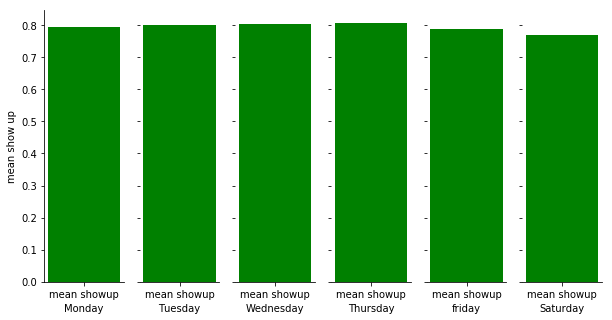

In [82]:
#we create a visual of mean showups for all the days of the week.
labels = ['mean showup'] #the general labels
locations=[1]
plt.rcParams["figure.figsize"] = (10,5)
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,sharey=True);

#monday
ax1.set(xlabel='Monday', ylabel='mean show up')
ax1.bar(locations, showup_mon_m, tick_label=labels, color= ("g"));
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#tuesday 
ax2.set(xlabel='Tuesday')
ax2.bar(locations, showup_mon_tue, tick_label=labels, color= ("g"));
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)


#wednesdays
ax3.set(xlabel='Wednesday')
ax3.bar(locations, showup_wed_m, tick_label=labels, color= ("g"));
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)

 
#thursdays
ax4.set(xlabel='Thursday')
ax4.bar(locations, showup_thu_m, tick_label=labels, color= ("g"));
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)

 
#fridays
ax5.set(xlabel='friday')
ax5.bar(locations, showup_fri_m, tick_label=labels, color= ("g"));
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)

 
#saturdays
ax6.set(xlabel='Saturday')
ax6.bar(locations, showup_sat_m, tick_label=labels, color= ("g"));
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)

 

>from the visual above it cann be inferred that the mean showups across the week days are fairly constant at 0.8 (+-0.05). therefore it can be concluded that there is no significant change in mean showups across weekdays.

>however, considering the count of appointments it was discovered that Wednesday with an appointment count of 25,866 had the most schedules closely followed by Tuesday(25,638) then Monday (22,713) which was then followed by Friday(19,019) and Thursday(17,246) then finally Saturday with just 39 appointments which presumably may be because these were emergency schedules or some sort of exception.



### Did patient physiological factors (hypertension, diabetes, if they were handicapped or alcoholics) affect showing up?


**first create a function that would calculate the attendance rates for patients with and without these medical conditions and visualize it**

In [83]:
def rateplot(schedule_df,condition):
    #this function would do the following;
    #1.calculate attendance rate for patients with the condition
    #2.calculate attendance rates for patients without the condition
    #3.visualize the mean showup for both.
    #the function also takes in two arguments schedule_df(the dataframe) and the medical condition.

    #mean show up when the condition is positive
    cond_pos= schedule_df.query(F"{condition} == 1")
    cond_pos_m=cond_pos.show_up.mean()#calculating the mean showup for this category
    cond_pos_m
    print(f"patients with {condition}:had attndance rate of {cond_pos_m*100:.2f}%")
    
    #mean show up when the condition is negative
    cond_neg= schedule_df.query(F"{condition} == 0")
    cond_neg_m=cond_neg.show_up.mean()#calculating the mean showup for this category
    cond_neg_m
    print(f"patients without {condition} had attndance rate of {cond_neg_m*100:.2f}%")
    
    #create a visual of mean showups for both condition positive and negative.
    labels = ['mean showup'] #the general labels
    locations=[1]
    plt.rcParams["figure.figsize"] = (4,7)
    fig, (ax1,ax2) = plt.subplots(1,2,sharey=True);
    # hypertension positigve
    ax1.set(xlabel=F"{condition} postive", ylabel='show up percentage')
    ax1.bar(locations,cond_pos_m, tick_label=labels, color= ("g"));
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    #hypertension negative
    ax2.set(xlabel=F'{condition} Negative')
    ax2.bar(locations,cond_neg_m , tick_label=labels, color= ("g"));
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    
    


**Hypertension**

An overview of the column

In [84]:
#get the total number of hypertension positive patients appointments
schedule_df.groupby('hypertension')["show_up"].count()

hypertension
0    88720
1    21801
Name: show_up, dtype: int64

>they were about 21,801 recorded appointments by hypertension positive patients.

In [85]:
#get the number of showups and misses
schedule_df.groupby(['hypertension',"show_up"])["show_up"].count()

hypertension  show_up
0             0          18542
              1          70178
1             0           3772
              1          18029
Name: show_up, dtype: int64

>of the 21,81 recorded hypertension positve appointments only 3,772 were missed.

>in the hypertension negative category 88,720 appointments with 18,542 misses.

Apply the rateplot function to get the percentage and visualization

patients with hypertension:had attndance rate of 82.70%
patients without hypertension had attndance rate of 79.10%


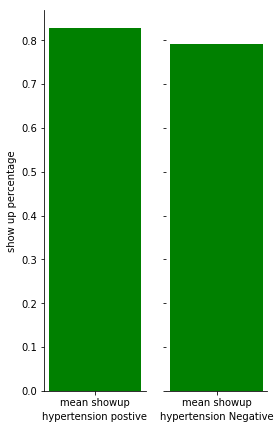

In [86]:
rateplot(schedule_df,"hypertension")

>from the visual above it can be seen that the mean showup for patients with hypertension(0.82) anad show up percentage of 82% is greater than those without hypertension(0.79) without 79%.

**Diabetes**

An overview of the column

In [87]:
#get the total number of diabetes positive patients appointments
schedule_df.groupby('diabetes')["show_up"].count()

diabetes
0    102578
1      7943
Name: show_up, dtype: int64

>there were 7,943 appointments booked by patients with cases of diabetes.

In [88]:
#get the number of show ups and misses
schedule_df.groupby(['diabetes',"show_up"])["show_up"].count()

diabetes  show_up
0         0          20884
          1          81694
1         0           1430
          1           6513
Name: show_up, dtype: int64

>of the 7,943 appointments by diabetic patients there were 6,513 show ups

apply the rateplot function

patients with diabetes:had attndance rate of 82.00%
patients without diabetes had attndance rate of 79.64%


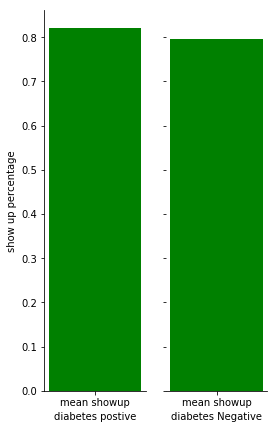

In [89]:
rateplot(schedule_df,"diabetes")

>from the above visual the mean show up for diabetic patients(0.819)with showup percentage of 82 is significantly greater than that of non diabetic patients(0.796) with showup perecentage of 79.6.

**handicapped**

An overview of the column

In [90]:
#get the total number of handicapped and non handicapped patients
schedule_df.groupby('handicap')["show_up"].count()

handicap
0    108282
1      2239
Name: show_up, dtype: int64

>there were only 2,239 appointments scheduled by handicapped patients.

In [91]:
#get the number of show ups and misses
schedule_df.groupby(['handicap',"show_up"])["show_up"].count()

handicap  show_up
0         0          21909
          1          86373
1         0            405
          1           1834
Name: show_up, dtype: int64

 apply the rateplot function

patients with handicap:had attndance rate of 81.91%
patients without handicap had attndance rate of 79.77%


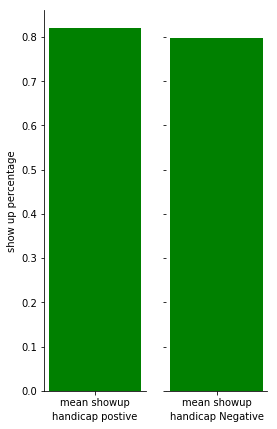

In [92]:
rateplot(schedule_df,"handicap")

>the mean showup for handicapped patients(0.819) with showup percentage of 81.90% was slightly higher than those of non handicapped patients(0.79) with showup percentage of 79%.

**Alcoholism**

An overview of the column

In [93]:
#get the total number of diabetes positive patients appointments
schedule_df.groupby('alcoholism')["show_up"].count()

alcoholism
0    107161
1      3360
Name: show_up, dtype: int64

>there were 3,360 appointments scheduled by alcoholic patients

In [94]:
#get the number of show ups and misses
schedule_df.groupby(['alcoholism',"show_up"])["show_up"].count()

alcoholism  show_up
0           0          21637
            1          85524
1           0            677
            1           2683
Name: show_up, dtype: int64

>of the 3,360 appoinments scheduled by alcoholic patients there were just 677 misses.

apply the rateplot function

patients with alcoholism:had attndance rate of 79.85%
patients without alcoholism had attndance rate of 79.81%


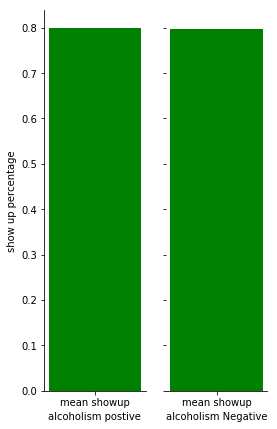

In [95]:
rateplot(schedule_df,"alcoholism")

>from the visual above it can be seen that the average showup for alcoholics(0.79851)and showup percentage of 79.85% and non alcohoics(0.7980) with show up percentage of 89.81% are almost fairly equal.

<a id='conclusions'></a>
## Conclusions

1. From the analysis it can deduced that the most percentage of misses was in the teens age group(26.1%) followed by the adult age group(21.0%) which was closely followed by the children age group (20.50%) then the least showup percentage was in the senoir citizens category(15%).Also the showups and misses by gender; misses ==> male=19.96% female=20.31%,showups ==>male=80.03 female = 79.68%  were almost identical for both genders. So it can be said that showups to an extent can be associated with Age but is almost gender Neutral.






2. From the analysis it was discovered that there was a very significant decrease in mean show ups across our wait time distributions. Having a peak at the 0 days group(0.95) and the lowest mean was in the >31 days group(0.67). This is indicative of the fact that appointments that were scheduled to hold on the very days the schedules were made had very high showup ratio and the longer the interval between the schedule day and the appointment the lower the level of showup.


3. From the visual above it cann be inferred that the mean showups across the week days are fairly constant at 0.8 (+-0.05). therefore it can be concluded that there was no significant change in mean showups across weekdays.
However, cosidering the number of appointments scheduled on the various days it was discovered that Wednesday with an appointment count of 25,866 had the most schedules, closely followed by Tuesday(25,638) then Monday (22,713) which was then followed by Friday(19,019) and Thursday(17,246) then finally Saturday with just 39 appointments which presumably may be because these were emergency schedules or some sort of exception.



4. From the analysis it was discovered that there were significant differences in the mean showups of appointments scheduled by patients with the following physiological conditions;

i. hypertensive patients(0.82), non hypertensive patients(0.79).

ii.diabetic patients(0.819), non diabetic patients(0.796)

iii. handicapped patients(0.819), non handicapped patients(0.79).

while the mean showup for alcoholics(0.79851) and non alcohoics(0.7980) were almost fairly equal.


This is indicative of the fact that hypertensive, diabetic and hsndicapped patients had slightly higer showup levels compared to non hypertensive, non diabetic and non diabetic patients while the showup levels for alcoholics and non alcoholics were almost the same.



**Limitations**

1.There were different numbers of rows for each category in columns like the number of Females were greater than the number of males and also number of data for specific days were greater than others. These were handled by taking proportions and use of mean(in cases where the columns were 0 and 1 digit indicators).

2.There was no time given for the appointment day, which could have been a big plus to boosting our analysis by creating insights to what time of the day had more or less misses or showups.


3.There were some rows where the date of the appointment was before the schedule date and one negatiove age column.

**References**

1.https://stackoverflow.com/

2.https://www.geeksforgeeks.org/

3.https://www.mathworks.com/

4.https://matplotlib.org/stable/index.html

5.https://pandas.pydata.org/docs/


In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0